# WeatherPy
----

### Analysis
* As expected, temperatures increase as we approach 0 latitude, and decrease to the left and to the right. Positive latitudes decrease to a lower temperature than neagtive latitudes.
* Although there is not as clear a relationship between humidity and latitude, we can observe that the humidity at 0 latitude does not drop below a certain point, as compared to positive and negative latitudes. 
* There does not seem to be an relationship between cloudiness and latitude.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm 
from pprint import pprint
from datetime import date
    
# Import API key
from api_keys import api_key
print(api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Outputs/Cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



bebd7c04fff4ba9ebc437306f5fb81a4


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#loop through cities to get weather 
name = []
lat = []
lng = []
temp = []
humidity = []
cloud = []
wind = []
date =[]
        

# for city in cities:
i = 1 
setCount = 1

print("Beginning Data Retrieval\n---------------------------------")
for city in cities:
        if i == 60:
            setCount = setCount + 1
            i = 1
            time.sleep(1)
        try:
                settings = {"units":"imperial",
                            "appid": api_key}
                currentCityWeather = owm.get_current(city, **settings)
                print(f"Processing record {i} of Set 1 | {city}") 

        #         if i == 1:
        #             pprint(currentCityWeather)

                name.append(currentCityWeather["name"])
                lat.append(currentCityWeather["coord"]["lat"])
                lng.append(currentCityWeather["coord"]["lon"])
                temp.append(currentCityWeather["main"]["temp"])
                humidity.append(currentCityWeather["main"]["humidity"])
                cloud.append(currentCityWeather["clouds"]["all"])
                wind.append(currentCityWeather["wind"]["speed"])
                date.append(currentCityWeather["dt"])

        except: print("City not found. Skipping...")
        i += 1
        

print("----------------------------------\nData Retrieval Complete\n----------------------------------")


Beginning Data Retrieval
---------------------------------
Processing record 1 of Set 1.
Processing record 2 of Set 1.
Processing record 3 of Set 1.
Processing record 4 of Set 1.
Processing record 5 of Set 1.
Processing record 6 of Set 1.
Processing record 7 of Set 1.
Processing record 8 of Set 1.
Processing record 9 of Set 1.
Processing record 10 of Set 1.
Processing record 11 of Set 1.
Processing record 12 of Set 1.
Processing record 13 of Set 1.
Processing record 14 of Set 1.
Processing record 15 of Set 1.
Processing record 16 of Set 1.
Processing record 17 of Set 1.
Processing record 18 of Set 1.
Processing record 19 of Set 1.
Processing record 20 of Set 1.
Processing record 21 of Set 1.
Processing record 22 of Set 1.
Processing record 23 of Set 1.
Processing record 24 of Set 1.
Processing record 25 of Set 1.
City not found. Skipping...
Processing record 27 of Set 1.
Processing record 28 of Set 1.
Processing record 29 of Set 1.
Processing record 30 of Set 1.
Processing record 31 of

Processing record 29 of Set 1.
City not found. Skipping...
Processing record 31 of Set 1.
Processing record 32 of Set 1.
Processing record 33 of Set 1.
Processing record 34 of Set 1.
Processing record 35 of Set 1.
Processing record 36 of Set 1.
Processing record 37 of Set 1.
Processing record 38 of Set 1.
Processing record 39 of Set 1.
Processing record 40 of Set 1.
Processing record 41 of Set 1.
Processing record 42 of Set 1.
Processing record 43 of Set 1.
Processing record 44 of Set 1.
Processing record 45 of Set 1.
Processing record 46 of Set 1.
Processing record 47 of Set 1.
City not found. Skipping...
Processing record 49 of Set 1.
Processing record 50 of Set 1.
City not found. Skipping...
City not found. Skipping...
Processing record 53 of Set 1.
Processing record 54 of Set 1.
Processing record 55 of Set 1.
Processing record 56 of Set 1.
Processing record 57 of Set 1.
Processing record 58 of Set 1.
Processing record 59 of Set 1.
Processing record 0 of Set 1.
Processing record 1 o

Processing record 59 of Set 1.
Processing record 0 of Set 1.
Processing record 1 of Set 1.
Processing record 2 of Set 1.
Processing record 3 of Set 1.
Processing record 4 of Set 1.
City not found. Skipping...
Processing record 6 of Set 1.
Processing record 7 of Set 1.
Processing record 8 of Set 1.
Processing record 9 of Set 1.
Processing record 10 of Set 1.
Processing record 11 of Set 1.
Processing record 12 of Set 1.
Processing record 13 of Set 1.
Processing record 14 of Set 1.
Processing record 15 of Set 1.
Processing record 16 of Set 1.
Processing record 17 of Set 1.
Processing record 18 of Set 1.
Processing record 19 of Set 1.
Processing record 20 of Set 1.
Processing record 21 of Set 1.
Processing record 22 of Set 1.
Processing record 23 of Set 1.
Processing record 24 of Set 1.
Processing record 25 of Set 1.
Processing record 26 of Set 1.
Processing record 27 of Set 1.
Processing record 28 of Set 1.
Processing record 29 of Set 1.
Processing record 30 of Set 1.
Processing record 31

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# create dictionary for all city weather
cityWeather = {
    "City": name,
    "Latitude": lat,
    "Longitude": lng,
    "Temperature": temp,
    "Humidity": humidity,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Date": date
}


# convert to DataFrame
cityWeather = pd.DataFrame(cityWeather)
cityWeather.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
0,Mataura,-46.19,168.86,55.00,75,20,8.01,1554065406
1,Mount Gambier,-37.83,140.78,51.80,93,90,2.13,1554062400
2,Anadyr,64.73,177.51,33.37,95,90,20.13,1554065547
3,Lixourion,38.20,20.43,54.25,81,0,4.70,1554066024
4,Warmbad,50.67,13.08,41.31,81,12,2.24,1554066317


In [7]:
# export to csv
cityWeather.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature(F)')

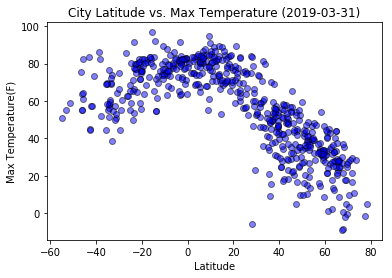

In [10]:

today = str(date.today())
lats = cityWeather["Latitude"]

plt.scatter(lats, cityWeather["Temperature"],marker="o", alpha=0.5, facecolors="blue", edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")


#### Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

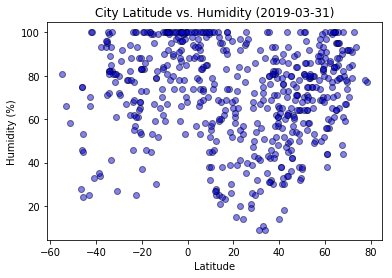

In [14]:
plt.scatter(lats, cityWeather["Humidity"],marker="o",alpha = 0.5, facecolors="blue", edgecolors="black")
plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

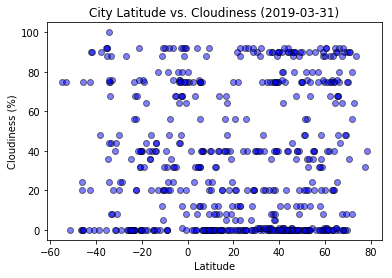

In [12]:
plt.scatter(lats, cityWeather["Cloudiness"],marker="o",alpha=0.5, facecolors="blue", edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

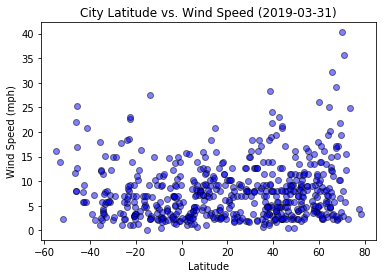

In [13]:
plt.scatter(lats, cityWeather["Wind Speed"],marker="o", alpha=0.5, facecolors="blue", edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")